In [1]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
#read data and rename column from #Passengers to Passenger
df1 = pd.read_csv('AirPassengers.csv')
df = df1.rename(columns={'#Passengers': "Passengers"})
df.head(10)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [51]:
df.dtypes

Month         object
Passengers     int64
dtype: object

In [52]:
#change format for Month from Object to date time format
df['Month']= pd.to_datetime(df['Month'])
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [53]:
#remove the old index column and set Month = index 
df.set_index('Month', inplace=True)
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


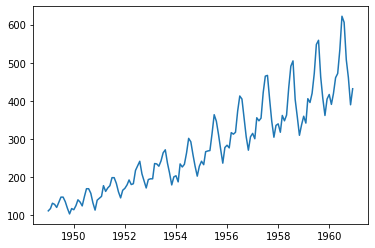

In [54]:
plt.plot(df['Passengers'])

In [55]:
#create a new column name 'Year', extracting the year in index column 
df['year'] = [d.year for d in df.index]
df.head(5)

,Passengers,year
Month,,
1949-01-01,112,1949
1949-02-01,118,1949
1949-03-01,132,1949
1949-04-01,129,1949
1949-05-01,121,1949


In [56]:
#create a new column name 'month' from the extraced data index
df['month']= [d.strftime('%b') for d in df.index]
years = df['year'].unique()
df.head(10)

,Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
1949-06-01,135,1949,Jun
1949-07-01,148,1949,Jul
1949-08-01,148,1949,Aug
1949-09-01,136,1949,Sep


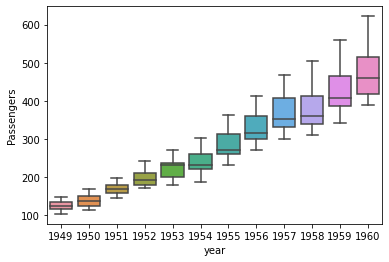

In [57]:
sns.boxplot(x='year', y='Passengers', data=df)

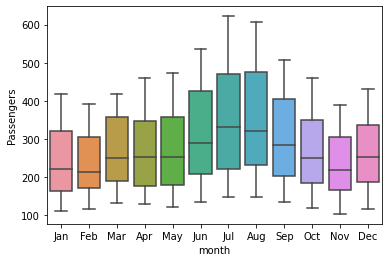

In [58]:
sns.boxplot(x='month', y='Passengers', data=df)

In [59]:
#extract and plot trend, seasonal and residuals
#additive time series: Value = base level + trend+seasonality + error
#Multiplicative time series: Value = base level x trend x seasonality x error 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['Passengers'], model = 'additive')

In [60]:
trend = decomposed.trend
seasonal = decomposed.seasonal
resudual = decomposed.resid
df.head(10)

,Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
1949-06-01,135,1949,Jun
1949-07-01,148,1949,Jul
1949-08-01,148,1949,Aug
1949-09-01,136,1949,Sep


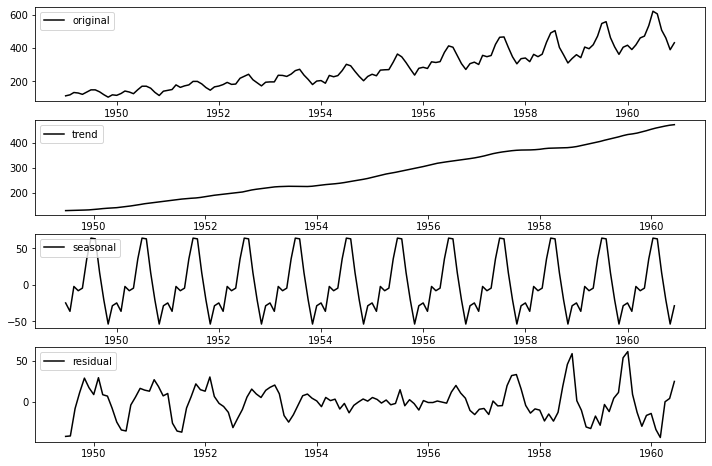

In [61]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Passengers'], label='original', color='black')
plt.legend (loc='upper left')
plt.subplot(412)
plt.plot(trend, label='trend', color='black')
plt.legend (loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='seasonal', color='black')
plt.legend (loc='upper left')
plt.subplot(414)
plt.plot(resudual, label='residual', color='black')
plt.legend (loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


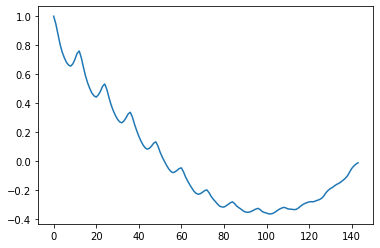

In [62]:
#Autocorrelation: correlation of a seris with its own lags/ value is correlated to itself. 
#How the number of passenger today is correlated to number of passenger 5 days ago/10days ago/last week, etc
#plot lags on x asix and correlation on y axis
#any correlation above confidence lines ar estatiscally significant 
from statsmodels.tsa.stattools import acf
acf_144 = acf(df.Passengers, nlags=144)
plt.plot(acf_144)

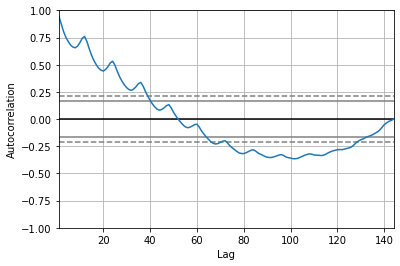

In [63]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Passengers)